## Install PM4PY library

In [ ]:
!pip install pm4py

## Necessary imports and settings

In [3]:
# mount your Google Drive directory
from google.colab import drive 
drive.mount('/content/gdrive')

# pm4py imports
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.filtering.log.timestamp import timestamp_filter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.algo.discovery.dfg import parameters

Mounted at /content/gdrive


## Import example log as pm4py object

In [5]:
myFile="gdrive/My Drive/projeto_cnj/colab/logs/running-example.xes"
log = xes_importer.apply(myFile)

## Print first trace, first event of first trace and log size

In [6]:
print('')
print('###### first trace ########')
print(log[0])

print('')
print('###### first event of first trace ########')
print(log[0][0])

print('')
print('###### number of traces ######')
print(len(log))


###### first trace ########
{'attributes': {'concept:name': '3', 'creator': 'Fluxicon Nitro'}, 'events': [{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2010, 12, 30, 14, 32, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}, '..', {'concept:name': 'pay compensation', 'org:resource': 'Ellen', 'time:timestamp': datetime.datetime(2011, 1, 15, 10, 45, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'Activity': 'pay compensation', 'Resource': 'Ellen', 'Costs': '200'}]}

###### first trace ########
{'concept:name': 'register request', 'org:resource': 'Pete', 'time:timestamp': datetime.datetime(2010, 12, 30, 14, 32, tzinfo=datetime.timezone(datetime.timedelta(0, 3600))), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': '50'}

###### number of traces ######
7


## Filter logs that do not contain activities in specified timestamp interval

In [7]:
filtered_log = timestamp_filter.filter_traces_intersecting\
               (log, "2011-01-01 00:00:00", "2011-01-08 23:59:59")

print('')
print('###### number of traces in filtered log ######')
print(len(filtered_log))


###### number of traces in filtered log ######
6


## Count frequency of each log variant

In [8]:
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

print('')
print('###### count frequency of each variant ######')
print(variants_count)


###### count frequency of each variant ######
[{'variant': 'register request,check ticket,examine casually,decide,pay compensation', 'count': 2}, {'variant': 'register request,examine thoroughly,check ticket,decide,reject request', 'count': 1}, {'variant': 'register request,examine casually,check ticket,decide,reinitiate request,examine thoroughly,check ticket,decide,pay compensation', 'count': 1}, {'variant': 'register request,examine casually,check ticket,decide,reinitiate request,check ticket,examine casually,decide,reinitiate request,examine casually,check ticket,decide,reject request', 'count': 1}, {'variant': 'register request,examine casually,check ticket,decide,pay compensation', 'count': 1}, {'variant': 'register request,check ticket,examine thoroughly,decide,reject request', 'count': 1}]


## Discover DFG from log creating edges based on *frequency*


###### dfg ######
<class 'collections.Counter'>
Counter({('check ticket', 'decide'): 6, ('examine casually', 'check ticket'): 4, ('decide', 'pay compensation'): 4, ('register request', 'examine casually'): 3, ('decide', 'reinitiate request'): 3, ('register request', 'check ticket'): 3, ('check ticket', 'examine casually'): 3, ('examine casually', 'decide'): 3, ('decide', 'reject request'): 3, ('examine thoroughly', 'check ticket'): 2, ('reinitiate request', 'examine thoroughly'): 1, ('register request', 'examine thoroughly'): 1, ('reinitiate request', 'check ticket'): 1, ('reinitiate request', 'examine casually'): 1, ('check ticket', 'examine thoroughly'): 1, ('examine thoroughly', 'decide'): 1})
[(('check ticket', 'decide'), 6), (('examine casually', 'check ticket'), 4), (('decide', 'pay compensation'), 4), (('register request', 'examine casually'), 3), (('decide', 'reinitiate request'), 3), (('register request', 'check ticket'), 3), (('check ticket', 'examine casually'), 3), (('exam

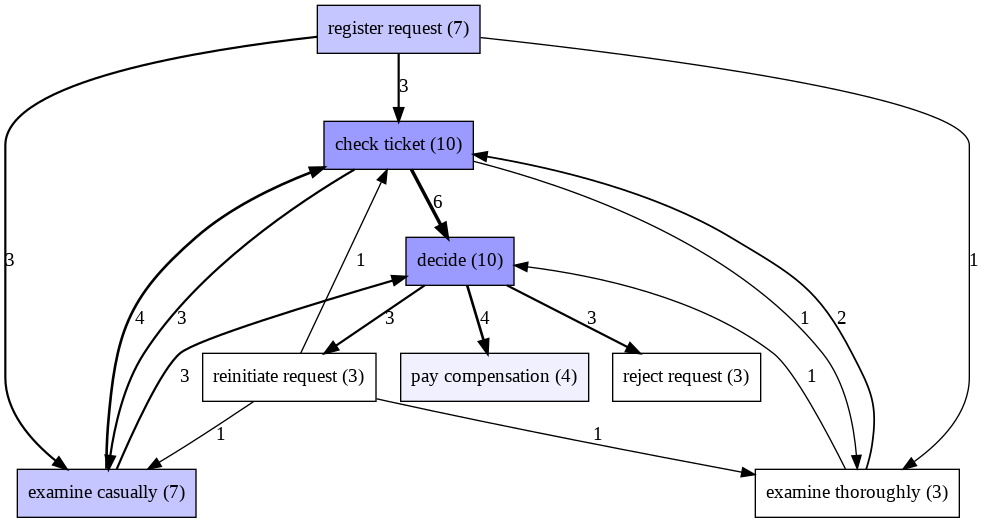

In [9]:
dfg = dfg_discovery.apply(log)

print('')
print('###### dfg ######')
print(type(dfg))
print(dfg)

# we can transform to list of tuples to filter afterwards
print(dfg.most_common())

# we can visualize the DFG
gviz = dfg_visualization.apply(dfg, 
                               log=log, 
                               variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

## Discover DFG from log creating edges based on *performance*


###### dfg ######
<class 'collections.Counter'>
Counter({('decide', 'pay compensation'): 261780.0, ('reinitiate request', 'check ticket'): 252900.0, ('examine casually', 'decide'): 242880.0, ('examine thoroughly', 'check ticket'): 167820.0, ('check ticket', 'examine thoroughly'): 95820.0, ('decide', 'reject request'): 92640.0, ('register request', 'examine thoroughly'): 83040.0, ('examine thoroughly', 'decide'): 76740.0, ('reinitiate request', 'examine casually'): 73080.0, ('decide', 'reinitiate request'): 10800.0, ('check ticket', 'examine casually'): 7440.0, ('examine casually', 'check ticket'): 5280.0, ('reinitiate request', 'examine thoroughly'): 2880.0, ('register request', 'check ticket'): 2400.0, ('register request', 'examine casually'): 2040.0, ('check ticket', 'decide'): 1800.0})


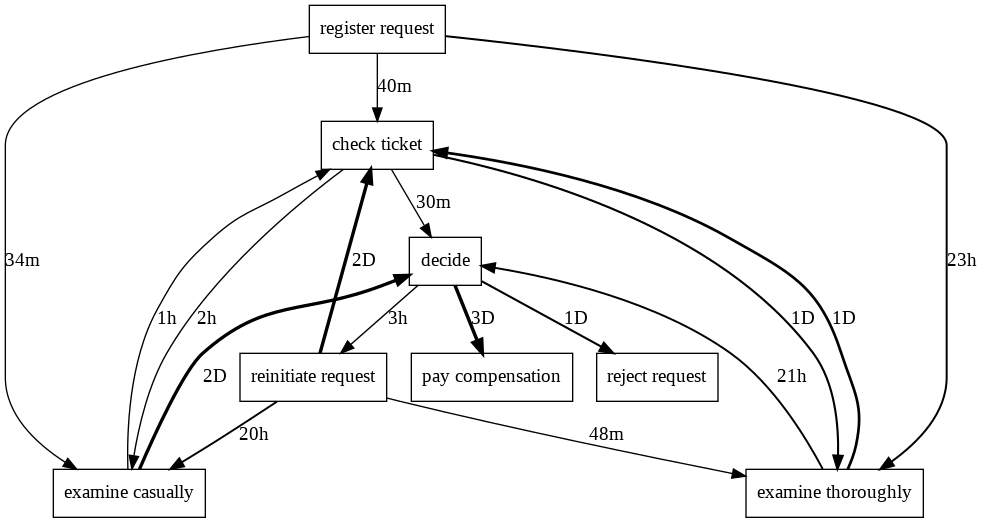

In [10]:
# discover DFG from log and obtain PERFORMANCE of edges
# for the performance we can have: ('min', 'max', 'mean', 'median')
# if we want 'total', do not pass any parameters
parameters  = {parameters.Parameters.AGGREGATION_MEASURE:'min'}

dfg = dfg_discovery.apply(log,
                          parameters=parameters,
                          variant=dfg_discovery.Variants.PERFORMANCE)

print('')
print('###### dfg ######')
print(type(dfg))
print(dfg)

# we can visualize the DFG
gviz = dfg_visualization.apply(dfg, 
                               log=log, 
                               variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)